<a href="https://colab.research.google.com/github/Yashodha-kapali8/ML_Programs/blob/main/K-Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROGRAM 10:**

Develop a program to implement k-means clustering using Wisconsin Breast Cancer data set and visualize the clustering result.



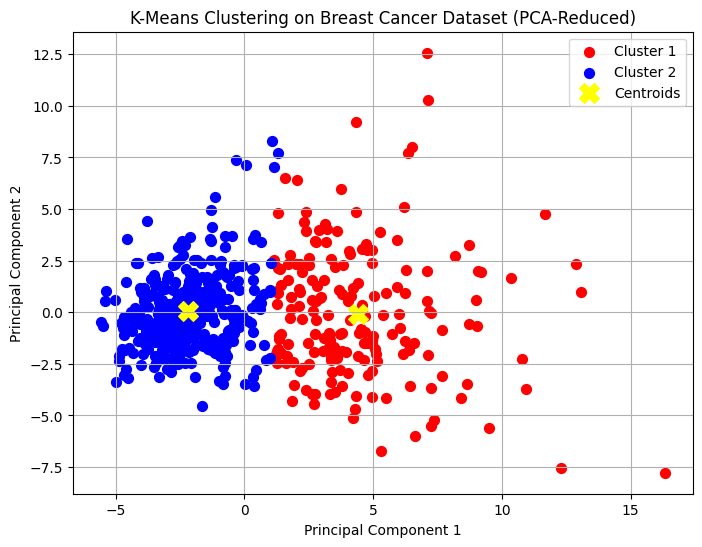

Confusion Matrix (True Labels vs. Cluster Labels):
[[175  37]
 [ 13 344]]


In [34]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target  # True labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensionality to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering (2 clusters for binary classification)
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Project the cluster centers into PCA space for visualization
centers_pca = pca.transform(kmeans.cluster_centers_)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], c='red', label='Cluster 1', s=50)
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], c='blue', label='Cluster 2', s=50)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='yellow', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on Breast Cancer Dataset (PCA-Reduced)')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Confusion matrix to evaluate clustering vs. true labels
cm = confusion_matrix(y, y_kmeans)
print("Confusion Matrix (True Labels vs. Cluster Labels):")
print(cm)